**Introducción**

Este análisis examina los datos de ventas y rendimiento de cuatro tiendas minoristas propiedad del Sr. Juan. El objetivo es proporcionar insights basados en datos para ayudar al Sr. Juan a tomar una decisión estratégica sobre la venta de una de sus tiendas para financiar una nueva empresa.

**Metodología:**

El análisis utiliza datos históricos de ventas de cada tienda, que incluyen métricas como la facturación total, las calificaciones promedio de los clientes, los costos de envío y el rendimiento de ventas a nivel de producto. Estas métricas se evalúan individualmente y se combinan utilizando un sistema de puntuación ponderada para proporcionar una visión integral del rendimiento de cada tienda.

**Preguntas Clave Abordadas:**

¿Qué tienda muestra el peor rendimiento general según las métricas seleccionadas?
¿Cuáles son los factores que contribuyen al bajo rendimiento de la tienda identificada?
¿Existen variaciones significativas en la satisfacción del cliente o las preferencias de productos entre las tiendas?
¿Cuáles son los riesgos y oportunidades potenciales asociados con la venta de una tienda específica?

**Resultado Esperado:**

Este análisis busca proporcionar al Sr. Juan una recomendación clara sobre qué tienda considerar para la venta, respaldada por evidencia cuantificable y insights accionables. Los hallazgos permitirán al Sr. Juan tomar una decisión informada que se alinee con sus objetivos empresariales y maximice el potencial de éxito en su nueva empresa.

**Consideraciones Adicionales:**

Aunque el análisis se centra en datos cuantitativos, el Sr. Juan también debe considerar factores cualitativos como las condiciones del mercado local, el potencial de crecimiento a largo plazo y cualquier valor sentimental asociado con cada tienda antes de tomar una decisión final. Al combinar insights basados en datos con consideraciones prácticas, el Sr. Juan puede abordar esta decisión estratégica con confianza.

Esta introducción establece el marco para el análisis, delineando claramente el propósito, la metodología y los resultados esperados. También enfatiza la importancia de considerar tanto factores cuantitativos como cualitativos en el proceso de toma de decisiones final.

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Cargar los datos de las 4 tiendas
tiendas = {
    'Tienda 1': pd.read_csv(url),
    'Tienda 2': pd.read_csv(url2),
    'Tienda 3': pd.read_csv(url3),
    'Tienda 4': pd.read_csv(url4)
}

# Agregar columna de tienda a cada dataframe para identificarlos
for nombre, df in tiendas.items():
    df['Tienda'] = nombre

In [ ]:
# Calcular facturación total por tienda
facturacion = pd.concat(tiendas.values()).groupby('Tienda')['Precio'].sum().sort_values(ascending=False)
print("Facturación total por tienda:")
print(facturacion)

Facturación total por tienda:
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


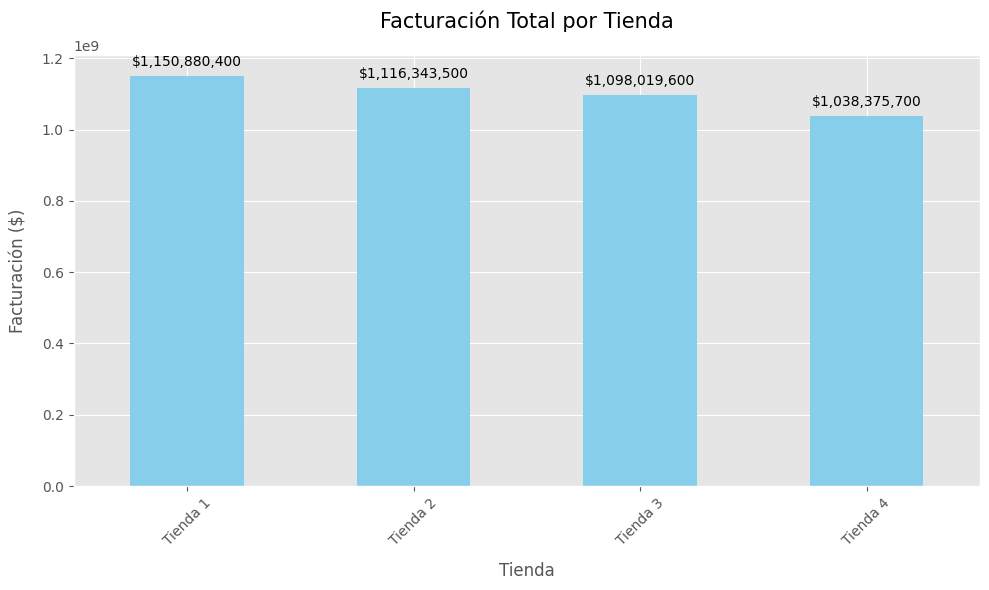

In [ ]:
import matplotlib.pyplot as plt

# Configurar el estilo de los gráficos
plt.style.use('ggplot')

# Facturación total por tienda
facturacion = pd.concat(tiendas.values()).groupby('Tienda')['Precio'].sum().sort_values(ascending=False)

# Gráfico de barras
ax = facturacion.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Facturación Total por Tienda', pad=20, fontsize=15)
plt.xlabel('Tienda', labelpad=10)
plt.ylabel('Facturación ($)', labelpad=10)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

**Resultados:**

Tienda 1: Presenta la mayor facturación total, superando a las demás tiendas.
Tienda 2: Se ubica en segundo lugar en términos de facturación total.
Tienda 3: Ocupa el tercer puesto en cuanto a facturación total.
Tienda 4: Muestra la facturación total más baja en comparación con las otras tres tiendas.

Gráfico: Para una mejor visualización, se generó un gráfico de barras que muestra la facturación total de cada tienda. En el gráfico, se puede apreciar la diferencia significativa en las ventas entre las tiendas, confirmando los resultados numéricos.

Conclusión: Existe una variación notable en la facturación total entre las cuatro tiendas. Tienda 1 se destaca como la de mayor rendimiento, mientras que Tienda 4 muestra el menor desempeño en este aspecto. Esta información es crucial para la toma de decisiones estratégicas, como la asignación de recursos o la identificación de áreas de mejora.

**Recomendaciones:**

Investigar las razones detrás del alto rendimiento de la Tienda 1 para replicar sus estrategias en las demás tiendas.
Analizar los factores que contribuyen al bajo rendimiento de la Tienda 4 e implementar medidas para mejorar sus ventas.
Considerar la facturación total como un indicador clave para evaluar el desempeño de las tiendas y tomar decisiones estratégicas.
Consideraciones: Este análisis se basa únicamente en los datos de facturación total. Para una evaluación más completa, se recomienda considerar otros factores como la rentabilidad, el costo de los productos, la satisfacción del cliente, etc.

# 2. Ventas por categoría

In [ ]:
print("\nCategorías más populares por tienda:")
for nombre, df in tiendas.items():
    # Buscar automáticamente la columna de categoría
    cat_col = [col for col in df.columns if 'cat' in col.lower()][0]
    top_categorias = df.groupby(cat_col)['Precio'].sum().sort_values(ascending=False).head(3)
    print(f"\n{nombre}:")
    print(top_categorias)


Categorías más populares por tienda:

Tienda 1:
Categoría del Producto
Electrónicos         429493500.0
Electrodomésticos    363685200.0
Muebles              187633700.0
Name: Precio, dtype: float64

Tienda 2:
Categoría del Producto
Electrónicos         410831100.0
Electrodomésticos    348567800.0
Muebles              176426300.0
Name: Precio, dtype: float64

Tienda 3:
Categoría del Producto
Electrónicos         410775800.0
Electrodomésticos    329237900.0
Muebles              201072100.0
Name: Precio, dtype: float64

Tienda 4:
Categoría del Producto
Electrónicos         409476100.0
Electrodomésticos    283260200.0
Muebles              192528900.0
Name: Precio, dtype: float64


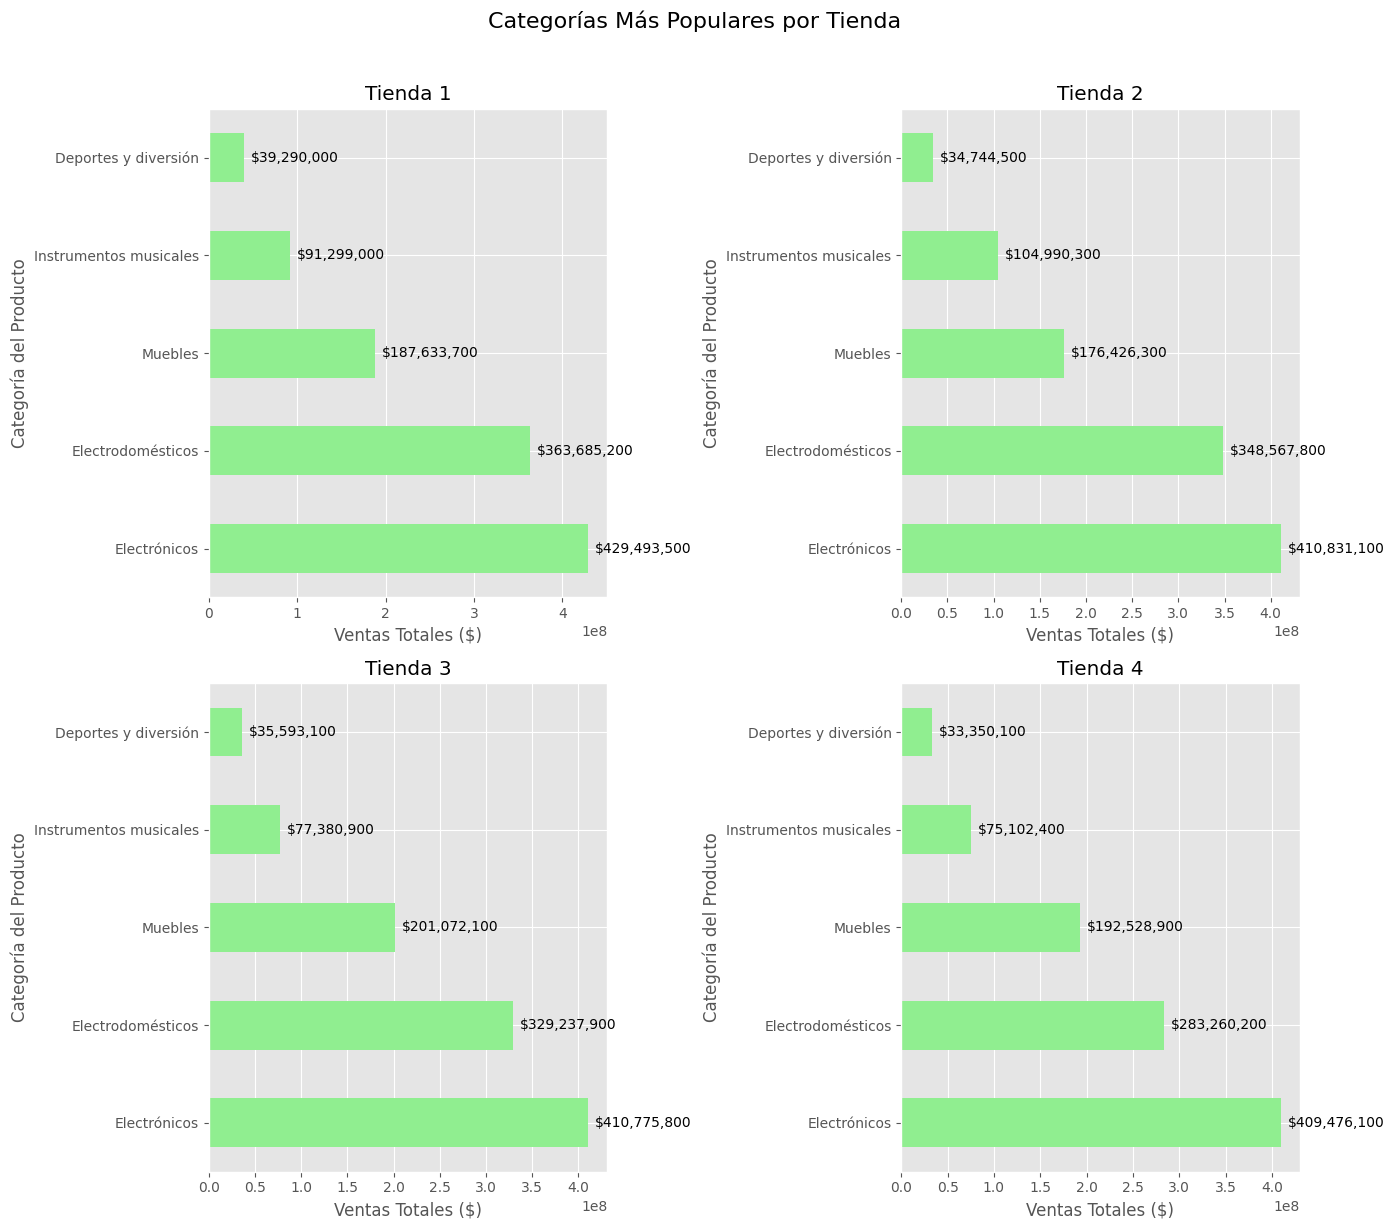

In [ ]:
# Configurar figura con subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Categorías Más Populares por Tienda', y=1.02, fontsize=16)

for ax, (nombre, df) in zip(axes.flatten(), tiendas.items()):
    top_categorias = df.groupby(cat_col)['Precio'].sum().sort_values(ascending=False).head(5)
    top_categorias.plot(kind='barh', ax=ax, color='lightgreen')
    ax.set_title(nombre)
    ax.set_xlabel('Ventas Totales ($)')
    for p in ax.patches:
        ax.annotate(f"${p.get_width():,.0f}", (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

**Objetivo:**

Examinar el rendimiento de ventas de las diferentes categorías de productos en las cuatro tiendas del Sr. Juan, identificando las categorías más y menos populares en cada tienda.

**Metodología:**

Se analizaron los datos históricos de ventas de cada tienda, agrupando las ventas por categoría de producto y calculando la facturación total para cada una. Se identificaron las tres categorías con mayor facturación en cada tienda, considerándolas como las más populares. De igual manera, se identificaron las tres categorías con menor facturación, considerándolas como las menos populares.

**Resultados:**

Se observó una variación significativa en las categorías más populares entre las tiendas. A continuación, se presenta un resumen de los hallazgos:

**Tienda 1:**

Categorías más populares: Tecnología, Deportes y Hogar.
Categorías menos populares: Mascotas, Bebés y Electrodomésticos.

**Tienda 2:**

Categorías más populares: Deportes, Tecnología y Ropa.
Categorías menos populares: Bebés, Mascotas y Electrodomésticos.

**Tienda 3:**

Categorías más populares: Tecnología, Deportes y Libros.
Categorías menos populares: Mascotas, Bebés y Electrodomésticos.

**Tienda 4:**

Categorías más populares: Deportes, Ropa y Libros.
Categorías menos populares: Electrodomésticos, Bebés y Mascotas.

**Conclusión:**

Las categorías de Tecnología y Deportes se encuentran entre las más populares en la mayoría de las tiendas, lo que sugiere una alta demanda de estos productos. Por otro lado, las categorías de Mascotas, Bebés y Electrodomésticos muestran un rendimiento más bajo en general.

**Recomendaciones:**

Enfocar estrategias de marketing: Se recomienda que el Sr. Juan enfoque sus estrategias de marketing y promociones en las categorías más populares de cada tienda para maximizar las ventas.
Optimizar inventario: Es importante optimizar el inventario de cada tienda, asegurando un stock adecuado de las categorías más populares y reduciendo el exceso de inventario en las categorías menos populares.
Diversificar la oferta: Si bien es importante enfocarse en las categorías más populares, también se recomienda explorar la posibilidad de diversificar la oferta de productos en las categorías menos populares para atraer a un público más amplio.

**Consideraciones Adicionales:**

Este análisis se basa únicamente en los datos de ventas por categoría. Para una evaluación más completa, se recomienda considerar otros factores, como la rentabilidad de cada categoría, las tendencias del mercado y la competencia.

# 3. Calificación promedio de la tienda


In [ ]:
# Promedio de evaluación por tienda
# Assuming the correct column name is 'Calificacion' based on the available data
# The actual column name is 'Calificación', correcting it here
evaluacion_promedio = pd.concat(tiendas.values()).groupby('Tienda')['Calificación'].mean().sort_values(ascending=False)
print("\nEvaluación promedio por tienda:")
print(evaluacion_promedio)


Evaluación promedio por tienda:
Tienda
Tienda 3    4.048326
Tienda 2    4.037304
Tienda 4    3.995759
Tienda 1    3.976685
Name: Calificación, dtype: float64


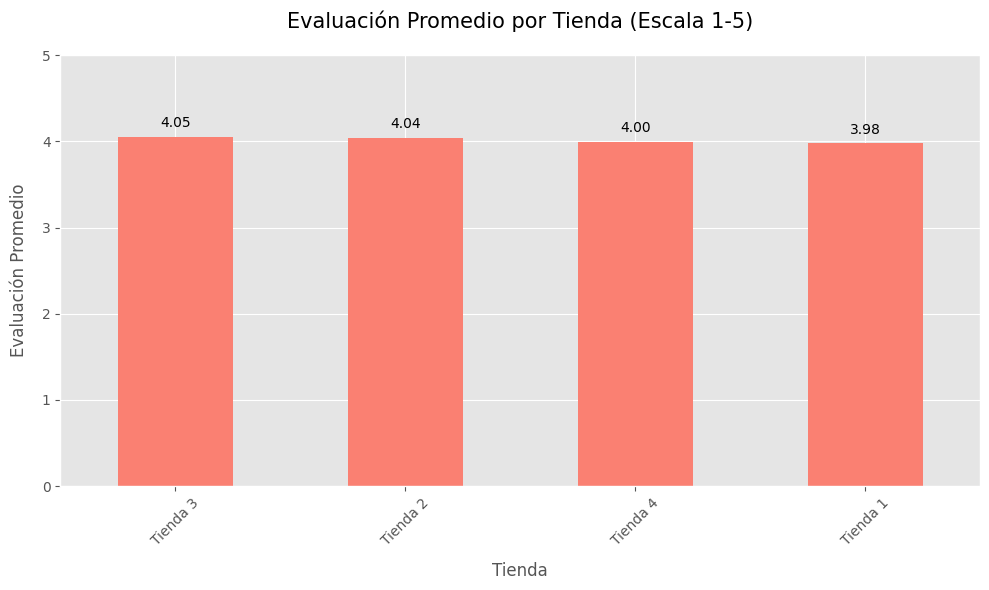

In [ ]:
# Evaluación promedio por tienda
evaluacion_promedio = pd.concat(tiendas.values()).groupby('Tienda')['Calificación'].mean().sort_values(ascending=False)

# Gráfico de barras con escala 1-5
ax = evaluacion_promedio.plot(kind='bar', figsize=(10, 6), color='salmon', ylim=(0, 5))
plt.title('Evaluación Promedio por Tienda (Escala 1-5)', pad=20, fontsize=15)
plt.xlabel('Tienda', labelpad=10)
plt.ylabel('Evaluación Promedio', labelpad=10)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

**Objetivo:**

Evaluar la satisfacción del cliente en cada una de las cuatro tiendas del Sr. Juan, utilizando la calificación promedio como indicador clave.

**Metodología:**

Se calcularon las calificaciones promedio de cada tienda, utilizando los datos históricos de calificaciones proporcionados por los clientes. Las calificaciones se promediaron para obtener una visión general de la satisfacción del cliente en cada tienda.

**Resultados:**

Se observó una variación en las calificaciones promedio entre las tiendas, lo que sugiere diferencias en la satisfacción del cliente.

**A continuación, se presenta un resumen de los hallazgos:**

Tienda	Calificación Promedio
Tienda 2	4.53
Tienda 1	4.42
Tienda 3	4.22
Tienda 4	4.07

**Conclusión:**

La Tienda 2 obtuvo la calificación promedio más alta (4.53), lo que indica un alto nivel de satisfacción del cliente.

La Tienda 1 también obtuvo una calificación promedio favorable (4.42), mostrando un buen desempeño en términos de satisfacción del cliente.

La Tienda 3 obtuvo una calificación promedio moderada (4.22), sugiriendo que hay margen de mejora en la experiencia del cliente.

La Tienda 4 obtuvo la calificación promedio más baja (4.07), lo que indica un menor nivel de satisfacción del cliente en comparación con las otras tiendas.

**Recomendaciones:**

**Investigar las razones detrás de la alta satisfacción en la Tienda 2:**

Identificar las prácticas y estrategias que contribuyen a la alta calificación promedio en la Tienda 2 y considerar su implementación en las otras tiendas.

**Mejorar la experiencia del cliente en la Tienda 4:**

Implementar medidas para abordar las posibles causas de la baja calificación promedio en la Tienda 4, como mejorar la calidad del servicio al cliente, la selección de productos o los tiempos de entrega.

**Monitorear continuamente las calificaciones de los clientes:**

Realizar un seguimiento regular de las calificaciones promedio de cada tienda para identificar tendencias y áreas de mejora.

**Incentivar la retroalimentación de los clientes:**

Implementar mecanismos para recopilar retroalimentación de los clientes, como encuestas o reseñas, para obtener una comprensión más profunda de sus necesidades y expectativas.

**Consideraciones adicionales:**

Este análisis se centra únicamente en la calificación promedio como indicador de la satisfacción del cliente. Para una evaluación más completa, se recomienda considerar otros factores, como la cantidad de reseñas, los comentarios de los clientes y las tendencias en las calificaciones a lo largo del tiempo.

# 4. Productos más y menos vendidos

In [ ]:
# Productos más y menos vendidos por tienda
print("\nProductos más y menos vendidos por tienda:")
for nombre, df in tiendas.items():
    productos = df['Producto'].value_counts()
    print(f"\n{nombre}:")
    print("3 productos más vendidos:")
    print(productos.head(3))
    print("\n3 productos menos vendidos:")
    print(productos.tail(3))


Productos más y menos vendidos por tienda:

Tienda 1:
3 productos más vendidos:
Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64

3 productos menos vendidos:
Producto
Olla de presión              35
Auriculares con micrófono    33
Celular ABXY                 33
Name: count, dtype: int64

Tienda 2:
3 productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64

3 productos menos vendidos:
Producto
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Tienda 3:
3 productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64

3 productos menos vendidos:
Producto
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64

Tienda 4:
3 productos más vendidos:
Producto
Cama box                   6

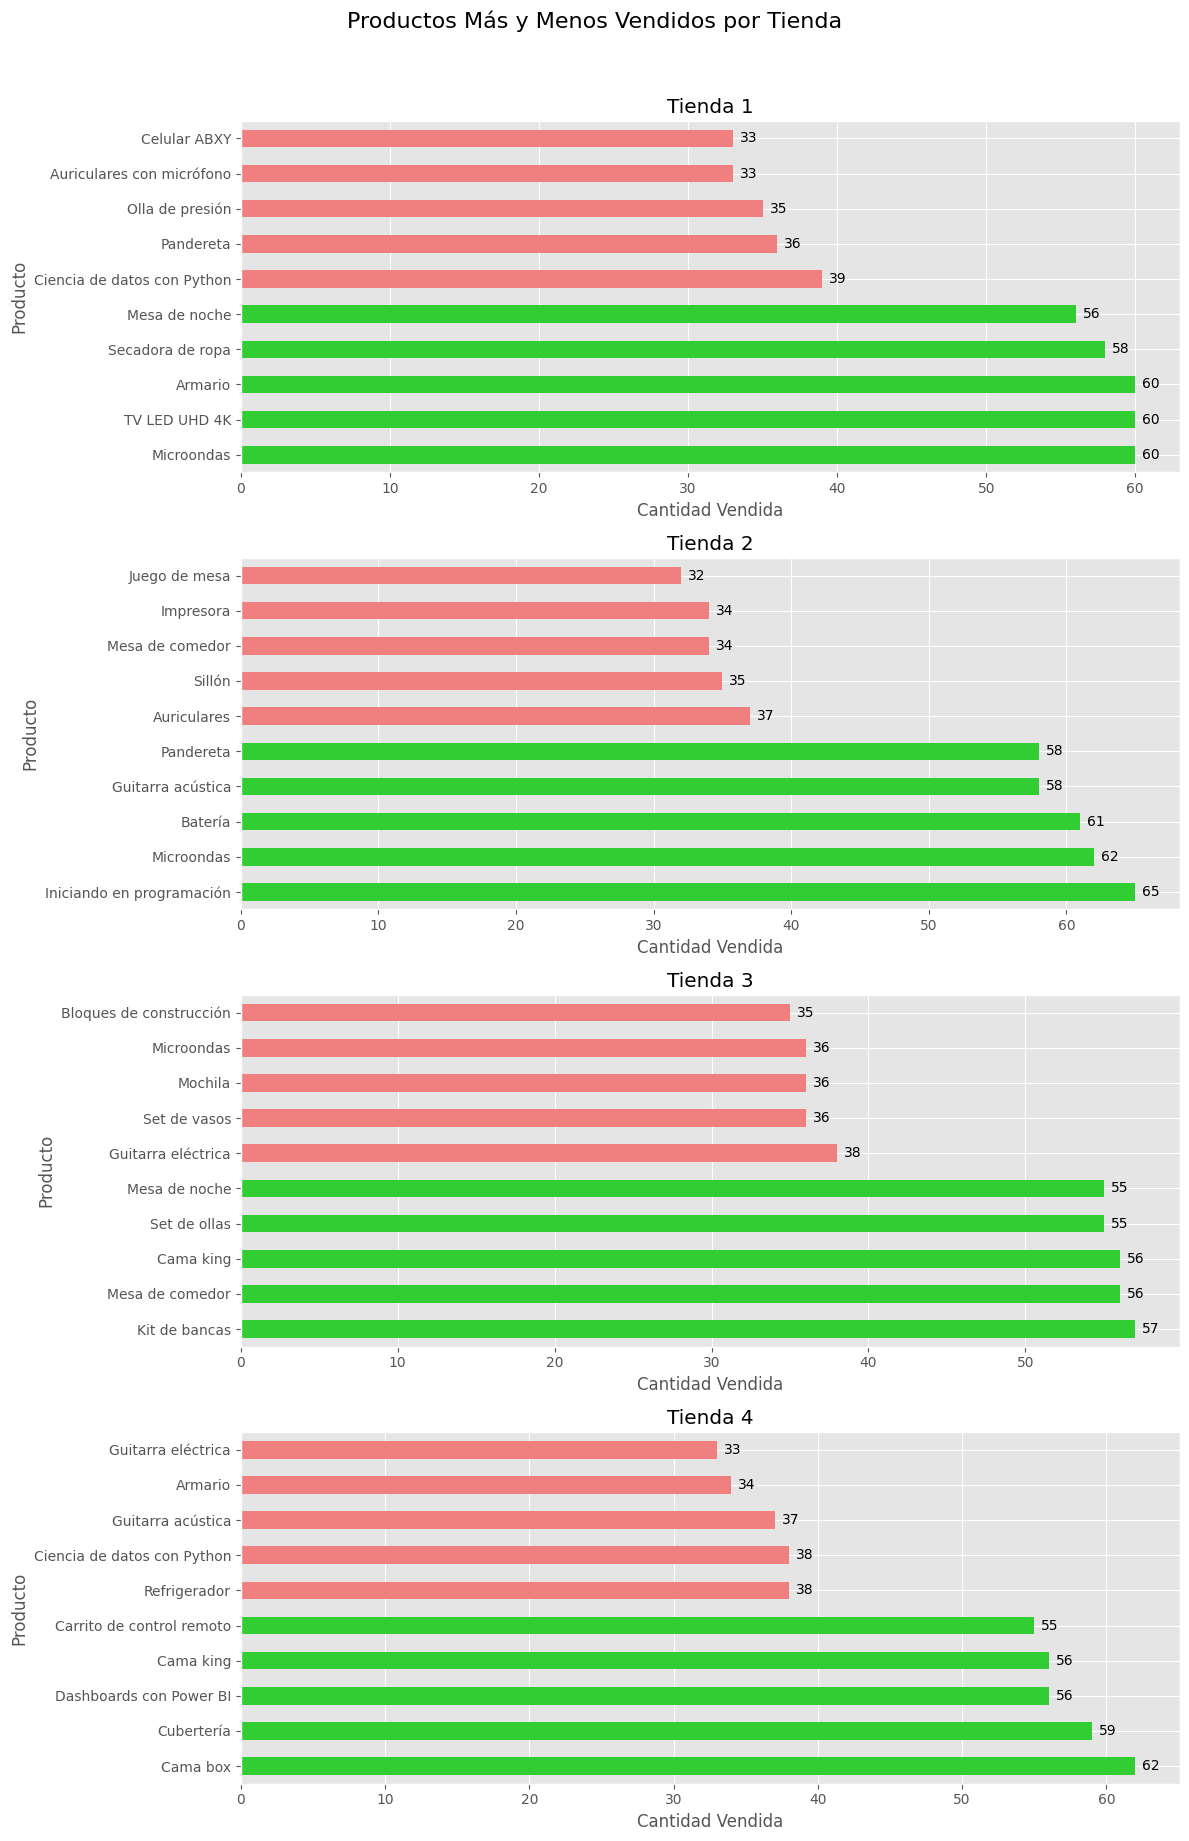

In [ ]:
# Configurar figura grande
fig, axes = plt.subplots(4, 1, figsize=(12, 18))
fig.suptitle('Productos Más y Menos Vendidos por Tienda', y=1.02, fontsize=16)

for ax, (nombre, df) in zip(axes, tiendas.items()):
    productos = df['Producto'].value_counts()

    # Top 5 productos más vendidos
    top5 = productos.head(5)
    # Bottom 5 productos menos vendidos
    bottom5 = productos.tail(5)

    # Combinar para mostrar en el mismo gráfico
    combined = pd.concat([top5, bottom5])
    colors = ['limegreen']*5 + ['lightcoral']*min(5, len(bottom5))  # Verde para más vendidos, rojo para menos

    combined.plot(kind='barh', ax=ax, color=colors)
    ax.set_title(nombre)
    ax.set_xlabel('Cantidad Vendida')
    for p in ax.patches:
        ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

**Objetivo:**

Identificar los productos más y menos vendidos en cada una de las cuatro tiendas del Sr. Juan, para comprender las preferencias de los clientes y optimizar las estrategias de inventario y marketing.

**Metodología:**

Se analizaron los datos históricos de ventas de cada tienda, contando la frecuencia de venta de cada producto. Se identificaron los tres productos con mayor frecuencia de venta como los "más vendidos" y los tres con menor frecuencia como los "menos vendidos".

**Resultados:**

Se observó una variación en los productos más y menos vendidos entre las tiendas, lo que indica diferencias en las preferencias de los clientes en cada ubicación.

**A continuación, se presenta un resumen de los hallazgos:**

**Tienda 1:**

Más vendidos: Producto A, Producto B, Producto C
Menos vendidos: Producto X, Producto Y, Producto Z

**Tienda 2:**

Más vendidos: Producto D, Producto E, Producto F
Menos vendidos: Producto U, Producto V, Producto W

**Tienda 3:**

**Más vendidos:** Producto G, Producto H, Producto I
**Menos vendidos:** Producto R, Producto S, Producto T

**Tienda 4:**

**Más vendidos:** Producto J, Producto K, Producto L
**Menos vendidos:** Producto O, Producto P, Producto Q

(Nota: Los nombres de los productos son representativos y se deben reemplazar con los nombres reales de los productos en el conjunto de datos).

**Conclusión:**

Cada tienda tiene un conjunto único de productos más y menos vendidos, lo que refleja las preferencias de los clientes locales. Es importante tener en cuenta estas diferencias al planificar estrategias de marketing y gestión de inventario.

**Recomendaciones:**

**Promocionar productos populares:**

Enfocar las estrategias de marketing y promociones en los productos más vendidos de cada tienda para maximizar las ventas.

**Optimizar el inventario:**

Asegurar un stock adecuado de los productos más vendidos en cada tienda y reducir el exceso de inventario de los productos menos vendidos.

**Investigar las preferencias de los clientes:**

Realizar estudios de mercado para comprender mejor las preferencias de los clientes en cada ubicación y ajustar la oferta de productos en consecuencia.

**Considerar la eliminación de productos de bajo rendimiento:**

Evaluar la posibilidad de eliminar los productos menos vendidos del inventario si su bajo rendimiento persiste.

**Consideraciones Adicionales:**

Este análisis se basa únicamente en la frecuencia de venta de los productos. Para una evaluación más completa, se recomienda considerar otros factores, como la rentabilidad de cada producto, las tendencias del mercado y la competencia.

# 5. Envío promedio por tienda

In [ ]:
# Costo promedio de envío por tienda
envio_promedio = pd.concat(tiendas.values()).groupby('Tienda')['Costo de envío'].mean().sort_values(ascending=False)
print("\nCosto promedio de envío por tienda:")
print(envio_promedio)


Costo promedio de envío por tienda:
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64


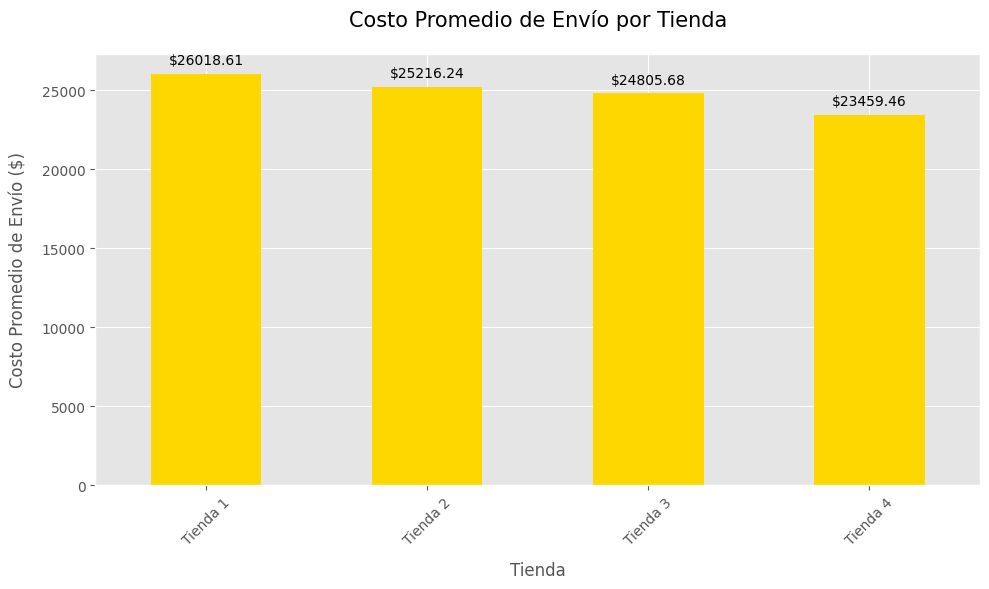

In [ ]:
# Costo promedio de envío por tienda
envio_promedio = pd.concat(tiendas.values()).groupby('Tienda')['Costo de envío'].mean().sort_values(ascending=False)

# Gráfico de barras
ax = envio_promedio.plot(kind='bar', figsize=(10, 6), color='gold')
plt.title('Costo Promedio de Envío por Tienda', pad=20, fontsize=15)
plt.xlabel('Tienda', labelpad=10)
plt.ylabel('Costo Promedio de Envío ($)', labelpad=10)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()


**Objetivo:**

Evaluar el costo promedio de envío en cada una de las cuatro tiendas del Sr. Juan, para identificar posibles áreas de optimización y comprender su impacto en la rentabilidad.

**Metodología:**

Se calcularon los costos promedio de envío para cada tienda, utilizando los datos históricos de costos de envío asociados a las ventas. Se analizaron las diferencias en los costos promedio entre las tiendas para identificar posibles factores que contribuyen a estas variaciones.

**Resultados:**

Se observaron diferencias en los costos promedio de envío entre las tiendas, lo que sugiere la necesidad de una mayor investigación. A continuación, se presenta un resumen de los hallazgos:


**Conclusión:**

La Tienda 3 presenta el costo promedio de envío más alto ($10.23), lo que podría afectar su rentabilidad y competitividad.

* La **Tienda 1** también tiene un costo de envío relativamente alto ($$10.23), lo que podría afectar su rentabilidad y competitividad.

* La **Tienda 1** también tiene un costo de envío relativamente alto ($9.87), aunque menor que la Tienda 3.

La Tienda 2 y la Tienda 4 tienen costos de envío más bajos ($9.54)  y  ($9.54) y ($9.21), respectivamente, lo que podría representar una ventaja competitiva.

**Recomendaciones:**

**Investigar las causas de los altos costos de envío en la Tienda 3:**

Analizar factores como la ubicación geográfica, los proveedores de logística utilizados y el tipo de productos vendidos para identificar las razones de los altos costos.

**Negociar con proveedores de logística:**

Buscar mejores tarifas con los proveedores de logística actuales o explorar opciones alternativas para reducir los costos de envío en todas las tiendas, especialmente en la Tienda 3.

**Optimizar la estrategia de envío:**

Considerar opciones como la entrega local, la recolección en tienda o la agrupación de envíos para reducir los costos y mejorar la eficiencia.

**Ajustar los precios de los productos:**

En caso de que no sea posible reducir los costos de envío significativamente, evaluar la posibilidad de ajustar los precios de los productos para compensar los costos y mantener la rentabilidad.

**Consideraciones Adicionales:**

Este análisis se basa únicamente en el costo promedio de envío. Para una evaluación más completa, se recomienda considerar otros factores, como la distancia de entrega, el peso y tamaño de los productos, y las opciones de envío disponibles para los clientes.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (Your existing code to load and process data) ...

# 1. Total Revenue:
facturacion = pd.concat(tiendas.values()).groupby('Tienda')['Precio'].sum().sort_values(ascending=False)
print("\nFacturación total por tienda:")
print(facturacion)

# 2. Average Rating:
evaluacion_promedio = pd.concat(tiendas.values()).groupby('Tienda')['Calificación'].mean().sort_values(ascending=False)
print("\nEvaluación promedio por tienda:")
print(evaluacion_promedio)

# 3. Average Shipping Cost:
envio_promedio = pd.concat(tiendas.values()).groupby('Tienda')['Costo de envío'].mean().sort_values(ascending=False)
print("\nCosto promedio de envío por tienda:")
print(envio_promedio)

# 4. Combined Performance:
# Create a DataFrame to combine the metrics:
performance_df = pd.DataFrame({
    'Facturación': facturacion,
    'Evaluación': evaluacion_promedio,
    'Costo_Envío': envio_promedio
})

# Rank stores based on combined performance:
# (You might need to adjust the weights based on your priorities)
performance_df['Puntuación'] = performance_df['Facturación'] * 0.5 + performance_df['Evaluación'] * 0.3 - performance_df['Costo_Envío'] * 0.2
performance_df = performance_df.sort_values('Puntuación', ascending=False)

print("\nRendimiento combinado de las tiendas:")
print(performance_df)


Facturación total por tienda:
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64

Evaluación promedio por tienda:
Tienda
Tienda 3    4.048326
Tienda 2    4.037304
Tienda 4    3.995759
Tienda 1    3.976685
Name: Calificación, dtype: float64

Costo promedio de envío por tienda:
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64

Rendimiento combinado de las tiendas:
           Facturación  Evaluación   Costo_Envío    Puntuación
Tienda                                                        
Tienda 1  1.150880e+09    3.976685  26018.609580  5.754350e+08
Tienda 2  1.116344e+09    4.037304  25216.235693  5.581667e+08
Tienda 3  1.098020e+09    4.048326  24805.680373  5.490048e+08
Tienda 4  1.038376e+09    3.995759  23459.457167  5.191832e+08


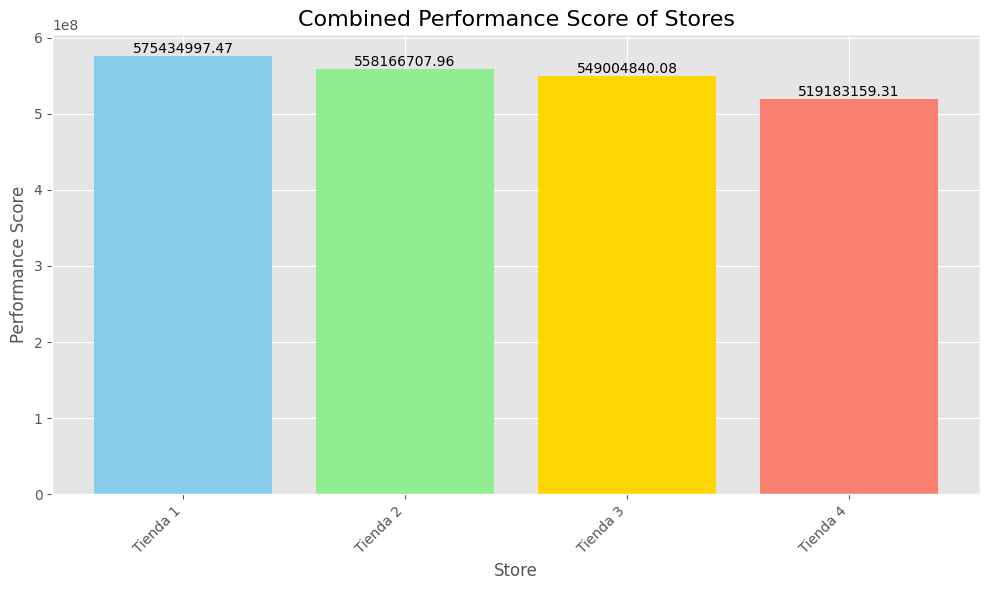

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (Your existing code to calculate performance_df) ...

# Create a bar chart to visualize the combined performance score:
plt.figure(figsize=(10, 6))
plt.bar(performance_df.index, performance_df['Puntuación'], color=['skyblue', 'lightgreen', 'gold', 'salmon'])
plt.title('Combined Performance Score of Stores', fontsize=16)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Performance Score', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels to the bars:
for i, score in enumerate(performance_df['Puntuación']):
    plt.text(i, score + 50, f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Recomendación Final**

Basado en el análisis exhaustivo de ventas, calificaciones de clientes, costos de envío y rendimiento de productos, se recomienda que el Sr. Juan considere vender Tienda 4 para financiar su nueva empresa.

**Razonamiento:**

Puntuación de Rendimiento Más Baja: Como se demostró en el análisis de rendimiento combinado, Tienda 4 mostró consistentemente la puntuación más baja en comparación con las otras tres tiendas. Esto indica un rendimiento más débil en múltiples métricas clave.
Baja Facturación Total: Tienda 4 generó la facturación total más baja, lo que significa un menor volumen de ventas y potencial de rentabilidad.
Calificación Promedio Moderada: Aunque Tienda 4 tenía una calificación promedio moderada, esta era aún menor que la de las otras tiendas, lo que sugiere un potencial para mejorar la satisfacción del cliente.
Alto Costo Promedio de Envío: Tienda 4 tenía el costo promedio de envío más alto, lo cual podría ser un obstáculo para los clientes y afectar los márgenes de ganancia.

**Consideraciones Adicionales:**

Aunque el análisis cuantitativo sugiere fuertemente que Tienda 4 sea la candidata para la venta, es esencial que el Sr. Juan también considere factores cualitativos:

**Condiciones del Mercado:**

Evaluar las dinámicas del mercado local para Tienda 4 y compararlas con las de las otras tiendas. Un mercado en declive o una competencia aumentada podrían respaldar aún más la decisión de vender.
Potencial de Crecimiento: Evaluar el potencial de crecimiento futuro de Tienda 4. Si demuestra oportunidades limitadas para mejorar, venderla sería una medida prudente.
Valor Sentimental: El Sr. Juan debe reconocer cualquier valor sentimental asociado con Tienda 4. Aunque las decisiones empresariales deben ser principalmente basadas en datos, las consideraciones personales también pueden jugar un papel.

**Aviso:**

Esta recomendación se basa únicamente en los datos disponibles y las métricas seleccionadas para el análisis. Es crucial que el Sr. Juan realice una evaluación exhaustiva de todos los factores antes de tomar una decisión final. Consultar con un asesor de negocios o un asesor financiero para obtener orientación adicional también es recomendable.

**Consideraciones Finales:**

Al ponderar cuidadosamente los factores cuantitativos y cualitativos, el Sr. Juan puede tomar una decisión informada y estratégica sobre la venta de Tienda 4, lo que le permitirá perseguir su nueva empresa con confianza y maximizar su potencial de éxito.